In [1]:
from typing import Iterable
from math import ceil

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from utils import load_dataset
from config import NBA_COLORS

In [2]:
games_details = load_dataset('games_details_regular', 2022)
games = load_dataset('games_regular', 2022)
ranking = load_dataset('ranking_regular', 2022)

## 특정 팀의 특정 시즌 Details를 만듦

In [3]:
def make_details(details: pd.DataFrame, teams: Iterable, seasons: list) -> pd.DataFrame:
    details_copy = details.copy()
    
    teams_cond = details_copy['TEAM'].isin(teams)
    seasons_cond = details_copy['SEASON'].isin(seasons)
    
    details_result = details_copy[teams_cond & seasons_cond]
    return details_result.drop(columns=['SEASON'])

In [4]:
high_teams = set(games_details[games_details['TEAM_LVL'] == '상위팀']['TEAM'].tolist())
seasons = [2019, 2020, 2021]
high_details = make_details(games_details, high_teams, seasons)
high_details

,GAME_ID,TEAM,TEAM_LVL,PLAYER_ID,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
DATE,,,,,,,,,,,,,,,,,,,,,
2019-10-22,21900002,L.A. Clippers,상위팀,202695,F,31.550000,10,19,0.526,1,...,1,5.0,6,5,2,1,6,5,30,5
2019-10-22,21900002,L.A. Clippers,상위팀,101150,SUB,36.716667,8,14,0.571,1,...,1,4.0,5,7,1,0,2,0,21,13
2019-10-22,21900002,L.A. Clippers,상위팀,1626149,SUB,38.366667,7,11,0.636,0,...,2,5.0,7,4,1,1,3,3,17,15
2019-10-22,21900002,L.A. Clippers,상위팀,201976,G,31.350000,1,7,0.143,0,...,2,8.0,10,6,0,1,2,4,2,13
2019-10-22,21900002,L.A. Clippers,상위팀,1629013,G,26.450000,3,8,0.375,2,...,0,3.0,3,2,0,0,0,1,8,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-29,42100307,Miami,상위팀,1629216,SUB,15.300000,1,4,0.250,1,...,0,0.0,0,1,0,0,1,2,4,-10
2022-05-29,42100307,Miami,상위팀,202710,F,48.000000,13,24,0.542,1,...,1,8.0,9,1,1,0,1,2,35,-4
2022-05-29,42100307,Miami,상위팀,1629622,G,35.416667,3,10,0.300,2,...,1,7.0,8,3,1,2,2,4,8,4


In [5]:
teams = ['Detroit']
seasons = [2022]
det_details = make_details(games_details, teams, seasons)
det_details

,GAME_ID,TEAM,TEAM_LVL,PLAYER_ID,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
DATE,,,,,,,,,,,,,,,,,,,,,
2022-10-19,22200003,Detroit,하위팀,1628977,SUB,14.466667,1,3,0.333,0,...,2,0.0,2,1,0,0,0,3,2,0
2022-10-19,22200003,Detroit,하위팀,202709,SUB,15.133333,3,3,1.000,2,...,0,1.0,1,2,0,0,0,3,8,-1
2022-10-19,22200003,Detroit,하위팀,1628995,SUB,13.166667,1,8,0.125,1,...,0,3.0,3,0,0,0,2,2,3,-2
2022-10-19,22200003,Detroit,하위팀,1631105,SUB,21.716667,7,13,0.538,0,...,5,5.0,10,1,0,3,3,0,14,7
2022-10-19,22200003,Detroit,하위팀,1630165,SUB,16.183333,1,9,0.111,0,...,0,5.0,5,5,3,1,0,1,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-21,22200467,Detroit,하위팀,202692,SUB,11.950000,2,5,0.400,1,...,0,0.0,0,1,1,0,0,2,7,-6
2022-12-21,22200467,Detroit,하위팀,1630180,SUB,27.083333,4,10,0.400,2,...,2,1.0,3,1,1,0,2,0,11,-6
2022-12-21,22200467,Detroit,하위팀,1628995,SUB,17.766667,1,5,0.200,0,...,0,1.0,1,0,1,0,4,1,2,-19


## Details의 종합 스탯을 만듦

In [6]:
def make_team_stats(team_details: pd.DataFrame, stats: list = ["PTS", "REB", "AST", "STL", "BLK", "TO"]) -> pd.Series:
    team_details_copy = team_details.copy()
    team_stats = team_details_copy.groupby('GAME_ID')[stats].sum().mean().round(1)
    return team_stats

In [7]:
stats = ["PTS", "REB", "AST", "STL", "BLK", "TO"]

In [8]:
high_stats = make_team_stats(high_details, stats)
high_stats.name = '상위팀'

high_stats

PTS    127.6
REB     50.8
AST     28.1
STL      8.4
BLK      5.1
TO      14.9
Name: 상위팀, dtype: float64

In [9]:
det_stats = make_team_stats(det_details, stats)
det_stats.name = 'Detroit'

det_stats

PTS    110.8
REB     42.9
AST     21.9
STL      6.7
BLK      3.6
TO      14.0
Name: Detroit, dtype: float64

## 선수 개별 스탯

In [51]:
def make_player_stats(details: pd.DataFrame, stats: list = ["PTS", "REB", "AST", "STL", "BLK", "TO"]) -> pd.DataFrame:
    details_copy = details.copy()
    
    # agg를 사용하면 한 번에 처리 가능
    def weighted_avg(group):
        weights = group['MIN']
        result = {}
        for stat in stats:
            if weights.sum() > 0:
                result[stat] = (group[stat] * weights).sum() / weights.sum()
            else:
                result[stat] = 0
        return pd.Series(result)
    
    player_stats = details_copy.groupby(['PLAYER_ID', 'START_POSITION']).apply(weighted_avg, include_groups=False).round(1).reset_index()
    return player_stats

In [52]:
player_stats = make_player_stats(games_details, stats)
player_stats

,PLAYER_ID,START_POSITION,PTS,REB,AST,STL,BLK,TO
0,101108,G,12.0,4.0,11.0,2.0,0.0,3.0
1,101109,G,13.0,2.0,2.0,0.0,0.0,1.0
2,101113,C,28.0,13.0,0.0,1.0,0.0,3.0
3,101114,G,14.0,2.0,6.0,0.0,0.0,4.0
4,101115,C,6.0,5.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
378,965,G,13.0,4.0,2.0,0.0,0.0,1.0
379,976,G,4.0,2.0,3.0,3.0,0.0,1.0
380,977,G,30.0,6.0,5.0,2.0,4.0,1.0
381,978,F,12.0,4.0,1.0,1.0,1.0,1.0


## 팀 단위 비교

In [12]:
import matplotlib.pyplot as plt
import platform

# OS 자동 감지 및 한글 폰트 설정
system = platform.system()

if system == 'Windows':
    # Windows: 맑은 고딕 사용
    plt.rcParams['font.family'] = 'Malgun Gothic'
    
elif system == 'Darwin':  # Darwin = macOS
    # macOS: 애플 고딕 사용
    plt.rcParams['font.family'] = 'AppleGothic'
    
elif system == 'Linux':
    # Linux: 나눔 고딕 사용 (사전 설치 필요)
    # 터미널: sudo apt-get install -y fonts-nanum
    plt.rcParams['font.family'] = 'NanumGothic'
    
else:
    print(f"알 수 없는 OS: {system}")

# 모든 OS 공통: 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print(f"OS: {system}, 설정된 폰트: {plt.rcParams['font.family']}")

OS: Linux, 설정된 폰트: ['NanumGothic']


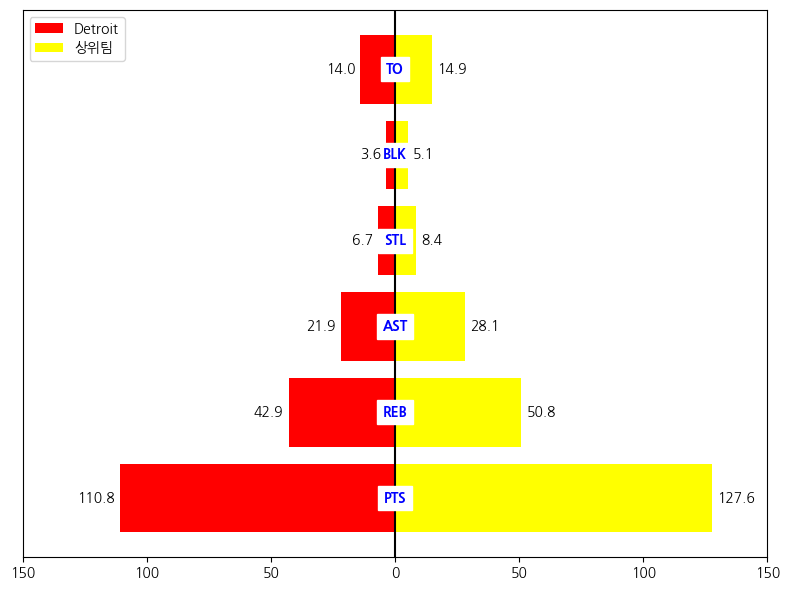

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# y축 위치
y = np.arange(len(stats))

fig, ax = plt.subplots(figsize=(8, 6))

# bar 그리기
ax.barh(y, -det_stats.values, color="red", label=det_stats.name)
ax.barh(y,  high_stats.values,  color="yellow",   label=high_stats.name)

# 중앙에 스탯 이름 표시
for i, stat in enumerate(stats):
    ax.text(0, i, stat, ha="center", va="center", fontsize=10, fontweight="bold", color='blue', backgroundcolor="white")

# 값 표시
for i, v in enumerate(det_stats):
    ax.text(-v-2, i, str(v), ha="right", va="center", color="black")
for i, v in enumerate(high_stats):
    ax.text(v+2, i, str(v), ha="left", va="center", color="black")

# x축 tick (음수 → 양수로 보이게)
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([abs(int(x)) for x in xticks])

# 중앙선 + 레이아웃
ax.axvline(0, color="black")
ax.set_yticks([])
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()


In [14]:
def get_default_color_palette():
    """기본 색깔 테마 반환 (NBA_COLORS가 없을 때 사용)"""
    return {
        'bad': '#ff6b6b',      # 빨간색 - 기준 미달
        'good': '#51cf66',     # 초록색 - 기준 통과
        'excellent': '#ffd43b', # 노란색 - 매우 좋음
        'team': '#339af0',     # 파란색 - 팀 색깔
        'F': '#e74c3c',        # Forward - 빨간색
        'G': '#3498db',        # Guard - 파란색  
        'C': '#f39c12',        # Center - 주황색
        'SUB': '#95a5a6'       # Sub - 회색
    }

In [ ]:
def plot_interactive_scatter(candidates, weak_stats, nba_colors=None, top_n=50):
    """인터랙티브 스캐터 플롯 (2개 스탯 관계)"""
    if len(candidates) == 0 or len(weak_stats) < 2:
        print("스캐터 플롯을 위해서는 최소 2개의 스탯이 필요합니다!")
        return None
    
    top_candidates = candidates.head(top_n).copy()

    if'START_POSITION' in top_candidates.columns:
        color_column = 'START_POSITION'
        default_colors = get_default_color_palette()
        color_map = {
            'F': default_colors['F'],
            'G': default_colors['G'],
            'C': default_colors['C'],
            'SUB': default_colors['SUB']
        }
        title_suffix = "(포지션 컬러)"
    else:
        color_column = None
        color_map = None
        title_suffix = ""
    
    fig = px.scatter(
        top_candidates,
        x=weak_stats[0],
        y=weak_stats[1],
        color=color_column,
        color_discrete_map=color_map,
        # size='total_score',
        hover_data=['PLAYER_NAME', 'START_POSITION'] if all(col in top_candidates.columns for col in ['PLAYER_NAME', 'START_POSITION']) else ['PLAYER_NAME'],
        title=f'🔍 {weak_stats[0]} vs {weak_stats[1]} 관계 {title_suffix}',
        labels={weak_stats[0]: weak_stats[0], weak_stats[1]: weak_stats[1]}
    )
    
    fig.update_layout(
        showlegend=True,
        width=800,
        height=600,
        template="plotly_white"
    )
    
    return fig

## 개별 스탯 분포

In [54]:
games_details = load_dataset('games_details').astype({'PLAYER_ID': str}).drop_duplicates(subset=['PLAYER_ID', 'PLAYER_NAME'])

player_map = games_details.set_index('PLAYER_ID')['PLAYER_NAME'].to_dict()

In [56]:
player_stats['PLAYER_NAME'] = player_stats['PLAYER_ID'].map(player_map)

In [57]:
player_stats

,PLAYER_ID,START_POSITION,PTS,REB,AST,STL,BLK,TO,PLAYER_NAME
0,101108,G,12.0,4.0,11.0,2.0,0.0,3.0,Chris Paul
1,101109,G,13.0,2.0,2.0,0.0,0.0,1.0,Raymond Felton
2,101113,C,28.0,13.0,0.0,1.0,0.0,3.0,Ike Diogu
3,101114,G,14.0,2.0,6.0,0.0,0.0,4.0,Deron Williams
4,101115,C,6.0,5.0,0.0,1.0,0.0,1.0,Andrew Bynum
...,...,...,...,...,...,...,...,...,...
378,965,G,13.0,4.0,2.0,0.0,0.0,1.0,Derek Fisher
379,976,G,4.0,2.0,3.0,3.0,0.0,1.0,Jeff McInnis
380,977,G,30.0,6.0,5.0,2.0,4.0,1.0,Kobe Bryant
381,978,F,12.0,4.0,1.0,1.0,1.0,1.0,Peja Stojakovic


In [65]:
det_details['PLAYER_NAME'] = det_details['PLAYER_ID'].map(player_map)
det_details['PLAYER_NAME'].drop_duplicates().tolist()

['Hamidou Diallo',
 'Cory Joseph',
 'Kevin Knox II',
 'Jalen Duren',
 'Killian Hayes',
 'Jaden Ivey',
 'Cade Cunningham',
 'Isaiah Stewart',
 'Bojan Bogdanovic',
 'Saddiq Bey',
 'Buddy Boeheim',
 'Rodney McGruder',
 'Braxton Key',
 'Isaiah Livers',
 'Nerlens Noel',
 'Alec Burks',
 'Marvin Bagley III']

In [67]:
det_details[det_details['START_POSITION'].isin(['F', 'G', 'C'])]['PLAYER_NAME'].drop_duplicates().tolist()

['Jaden Ivey',
 'Cade Cunningham',
 'Isaiah Stewart',
 'Bojan Bogdanovic',
 'Saddiq Bey',
 'Cory Joseph',
 'Killian Hayes',
 'Marvin Bagley III',
 'Isaiah Livers',
 'Rodney McGruder',
 'Jalen Duren']

In [63]:
weak_stats = ['AST', 'PTS']
plot_interactive_scatter(player_stats, weak_stats=weak_stats, nba_colors=NBA_COLORS, top_n=1000)

### 그래프 기본 설정

In [ ]:
def set_plot_style():
    """그래프 스타일 설정"""
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.rcParams['font.size'] = 10
    sns.set_palette("husl")

In [ ]:
def get_color_palette():
    """색깔 테마 반환"""
    return {
        'bad': '#ff6b6b',      # 빨간색 - 기준 미달
        'good': '#51cf66',     # 초록색 - 기준 통과
        'excellent': '#ffd43b', # 노란색 - 매우 좋음
        'team': '#339af0'      # 파란색 - 팀 색깔
    }


In [ ]:
def calculate_thresholds(player_stats, stats, percentile=0.7):
    """
    각 스탯별 기준값 자동 계산
    
    Args:
        player_stats: 선수 데이터
        stats: 스탯 리스트
        percentile: 백분위수 (0.7 = 상위 30%)
    
    Returns:
        dict: {스탯명: 기준값}
    """
    thresholds = {}
    for stat in stats:
        thresholds[stat] = player_stats[stat].quantile(percentile)
    return thresholds

In [ ]:
def filter_available_players(player_stats, team_players):
    """우리 팀 제외한 선수들만 반환"""
    return player_stats[~player_stats['PLAYER_ID'].isin(team_players)].copy()


### 개별 스탯 분석 함수들

In [ ]:
def analyze_single_stat(player_stats, stat, threshold, title_prefix=""):
    """
    하나의 스탯에 대한 분석
    
    Args:
        player_stats: 선수 데이터
        stat: 분석할 스탯명
        threshold: 기준값
        title_prefix: 제목 앞에 붙일 텍스트
    
    Returns:
        good_players: 기준 통과 선수들
        bad_players: 기준 미달 선수들
    """
    good_players = player_stats[player_stats[stat] >= threshold]
    bad_players = player_stats[player_stats[stat] < threshold]
    
    print(f"📊 {title_prefix}{stat} 분석:")
    print(f"   기준: {threshold:.1f} 이상")
    print(f"   통과: {len(good_players)}명 / 전체: {len(player_stats)}명")
    print(f"   통과율: {len(good_players)/len(player_stats)*100:.1f}%")
    
    return good_players, bad_players

In [ ]:
def plot_single_stat_distribution(good_players, bad_players, stat, threshold):
    """
    하나의 스탯 분포를 히스토그램으로 그리기
    
    Args:
        good_players, bad_players: analyze_single_stat 결과
        stat: 스탯명
        threshold: 기준값
    
    Returns:
        plotly figure
    """
    colors = get_color_palette()
    
    # 데이터 합치기
    plot_data = []
    
    # 기준 미달 선수들
    for value in bad_players[stat]:
        plot_data.append({'value': value, 'category': f'기준 미달 ({len(bad_players)}명)', 'stat': stat})
    
    # 기준 통과 선수들
    for value in good_players[stat]:
        plot_data.append({'value': value, 'category': f'기준 통과 ({len(good_players)}명)', 'stat': stat})
    
    df_plot = pd.DataFrame(plot_data)
    
    # 히스토그램 생성
    fig = px.histogram(
        df_plot, 
        x='value', 
        color='category',
        color_discrete_map={
            f'기준 미달 ({len(bad_players)}명)': colors['bad'],
            f'기준 통과 ({len(good_players)}명)': colors['good']
        },
        title=f'📈 {stat} 분포',
        labels={'value': f'{stat} 수치', 'count': '선수 수'},
        opacity=0.7,
        marginal="rug"
    )
    
    # 기준선 추가
    fig.add_vline(x=threshold, line_dash="dash", line_color="black", 
                  annotation_text=f"기준: {threshold:.1f}")
    
    fig.update_layout(
        showlegend=True,
        width=800,
        height=500,
        template="plotly_white"
    )
    
    return fig

### 다중 스탯 분석 함수들

In [ ]:
def find_candidates_all_stats(player_stats, weak_stats, thresholds):
    """
    모든 약한 스탯 조건을 만족하는 선수들 찾기
    
    Args:
        player_stats: 선수 데이터
        weak_stats: 약한 스탯 리스트
        thresholds: 각 스탯별 기준값 딕셔너리
    
    Returns:
        candidates: 모든 조건을 만족하는 선수들
    """
    candidates = player_stats.copy()
    
    print("🔍 다중 조건 필터링:")
    print(f"   시작: {len(candidates)}명")
    
    for stat in weak_stats:
        before_count = len(candidates)
        candidates = candidates[candidates[stat] >= thresholds[stat]]
        print(f"   {stat} >= {thresholds[stat]:.1f}: {before_count}명 → {len(candidates)}명")
    
    print(f"✅ 최종 후보: {len(candidates)}명")
    return candidates

In [ ]:
def calculate_total_score(candidates, weak_stats, method='sum'):
    """
    후보들의 종합 점수 계산
    
    Args:
        candidates: 후보 선수들
        weak_stats: 약한 스탯 리스트
        method: 'sum', 'mean', 'weighted' 중 선택
    
    Returns:
        candidates: 'total_score' 컬럼이 추가된 데이터
    """
    candidates = candidates.copy()
    
    if method == 'sum':
        candidates['total_score'] = candidates[weak_stats].sum(axis=1)
    elif method == 'mean':
        candidates['total_score'] = candidates[weak_stats].mean(axis=1)
    elif method == 'weighted':
        # 가중치를 다르게 줄 수 있음 (나중에 확장 가능)
        weights = [1.0] * len(weak_stats)  # 현재는 동일 가중치
        weighted_sum = sum(candidates[stat] * weight for stat, weight in zip(weak_stats, weights))
        candidates['total_score'] = weighted_sum
    
    return candidates.sort_values('total_score', ascending=False)

### 시각화 함수들

In [ ]:
def plot_multiple_stats_faceted(player_stats, weak_stats, thresholds):
    """
    여러 스탯을 facet으로 한 번에 시각화
    
    Args:
        player_stats: 선수 데이터
        weak_stats: 약한 스탯 리스트
        thresholds: 기준값 딕셔너리
    
    Returns:
        plotly figure
    """
    colors = get_color_palette()
    
    # 데이터 재구성
    plot_data = []
    
    for stat in weak_stats:
        threshold = thresholds[stat]
        
        for _, player in player_stats.iterrows():
            category = '기준 통과' if player[stat] >= threshold else '기준 미달'
            plot_data.append({
                'PLAYER_ID': player['PLAYER_ID'],
                'stat_name': stat,
                'stat_value': player[stat],
                'category': category,
                'threshold': threshold
            })
    
    df_plot = pd.DataFrame(plot_data)
    
    # Faceted 히스토그램
    fig = px.histogram(
        df_plot, 
        x='stat_value', 
        color='category',
        facet_col='stat_name',
        color_discrete_map={
            '기준 미달': colors['bad'],
            '기준 통과': colors['good']
        },
        title='📊 약한 스탯들 분석',
        labels={'stat_value': '스탯 수치', 'count': '선수 수'},
        opacity=0.7
    )
    
    # 각 facet에 기준선 추가
    for i, stat in enumerate(weak_stats):
        fig.add_vline(
            x=thresholds[stat], 
            line_dash="dash", 
            line_color="black",
            annotation_text=f"기준: {thresholds[stat]:.1f}",
            col=i+1
        )
    
    fig.update_layout(
        showlegend=True,
        width=300 * len(weak_stats),
        height=400,
        template="plotly_white"
    )
    
    return fig

In [ ]:
def plot_top_candidates_bar(candidates, weak_stats, top_n=10):
    """
    상위 후보들을 막대그래프로 표시
    
    Args:
        candidates: 점수가 계산된 후보들
        weak_stats: 약한 스탯 리스트
        top_n: 상위 몇 명까지 표시할지
    
    Returns:
        plotly figure
    """
    if len(candidates) == 0:
        print("😅 표시할 후보가 없습니다!")
        return None
    
    colors = get_color_palette()
    top_candidates = candidates.head(top_n).copy()
    
    # 순위와 색깔 지정
    top_candidates['rank'] = range(1, len(top_candidates) + 1)
    top_candidates['color_category'] = top_candidates['rank'].apply(
        lambda x: 'TOP 5' if x <= 5 else '6-10위'
    )
    
    fig = px.bar(
        top_candidates,
        x='rank',
        y='total_score',
        color='color_category',
        color_discrete_map={
            'TOP 5': colors['excellent'],
            '6-10위': colors['good']
        },
        title=f'🏆 TOP {len(top_candidates)} 후보 선수들',
        labels={'rank': '순위', 'total_score': '종합 점수'},
        text='total_score'
    )
    
    # 텍스트 포맷 설정
    fig.update_traces(texttemplate='%{text:.1f}', textposition='outside')
    
    # x축을 순위로 표시
    fig.update_xaxes(
        tickmode='array',
        tickvals=top_candidates['rank'],
        ticktext=[f'{r}위' for r in top_candidates['rank']]
    )
    
    fig.update_layout(
        showlegend=True,
        width=800,
        height=500,
        template="plotly_white"
    )
    
    return fig


In [ ]:
def plot_team_vs_candidates_comparison(player_stats, team_players, candidates, weak_stats):
    """
    우리 팀 vs 후보들 비교 차트
    
    Args:
        player_stats: 전체 선수 데이터
        team_players: 우리 팀 선수 리스트
        candidates: 후보 선수들
        weak_stats: 비교할 스탯들
    
    Returns:
        plotly figure
    """
    if len(candidates) == 0:
        print("비교할 후보가 없습니다!")
        return None
    
    colors = get_color_palette()
    
    # 평균 계산
    team_data = player_stats[player_stats['PLAYER_ID'].isin(team_players)]
    team_avg = team_data[weak_stats].mean()
    candidate_avg = candidates[weak_stats].mean()
    
    # 비교 데이터 생성
    comparison_data = []
    
    for stat in weak_stats:
        comparison_data.append({
            'stat': stat,
            'value': team_avg[stat],
            'group': '우리 팀 평균'
        })
        comparison_data.append({
            'stat': stat,
            'value': candidate_avg[stat],
            'group': '후보 선수 평균'
        })
    
    df_comparison = pd.DataFrame(comparison_data)
    
    fig = px.bar(
        df_comparison,
        x='stat',
        y='value',
        color='group',
        color_discrete_map={
            '우리 팀 평균': colors['team'],
            '후보 선수 평균': colors['good']
        },
        title='🆚 우리 팀 vs 후보 선수들 비교',
        labels={'stat': '스탯', 'value': '평균값'},
        text='value',
        barmode='group'
    )
    
    # 텍스트 포맷 설정
    fig.update_traces(texttemplate='%{text:.1f}', textposition='outside')
    
    fig.update_layout(
        showlegend=True,
        width=800,
        height=500,
        template="plotly_white"
    )
    
    return fig

In [ ]:
def plot_scatter_matrix(candidates, weak_stats, top_n=20):
    """
    상위 후보들의 스탯 간 관계를 scatter matrix로 표시
    
    Args:
        candidates: 후보 선수들
        weak_stats: 분석할 스탯들
        top_n: 상위 몇 명까지 표시할지
    
    Returns:
        plotly figure
    """
    if len(candidates) == 0:
        print("😅 표시할 후보가 없습니다!")
        return None
    
    top_candidates = candidates.head(top_n).copy()
    top_candidates['rank_category'] = top_candidates.index.map(
        lambda x: 'TOP 10' if x < 10 else 'TOP 20'
    )
    
    fig = px.scatter_matrix(
        top_candidates,
        dimensions=weak_stats,
        color='rank_category',
        title=f'🔍 TOP {len(top_candidates)} 후보들의 스탯 관계 분석',
        labels={stat: stat for stat in weak_stats}
    )
    
    fig.update_layout(
        width=800,
        height=600,
        template="plotly_white"
    )
    
    return fig

In [ ]:
def plot_radar_chart(player_stats, team_players, candidates, weak_stats, top_n=5):
    """
    레이더 차트로 팀 vs 상위 후보들 비교
    
    Args:
        player_stats: 전체 선수 데이터
        team_players: 우리 팀 선수 리스트
        candidates: 후보 선수들
        weak_stats: 비교할 스탯들
        top_n: 상위 몇 명까지 표시할지
    
    Returns:
        plotly figure
    """
    if len(candidates) == 0:
        print("😅 표시할 후보가 없습니다!")
        return None
    
    # 데이터 정규화 (0-1 스케일)
    all_data = player_stats[weak_stats]
    min_vals = all_data.min()
    max_vals = all_data.max()
    
    def normalize(data):
        return (data - min_vals) / (max_vals - min_vals)
    
    # 팀 평균
    team_data = player_stats[player_stats['PLAYER_ID'].isin(team_players)]
    team_avg = normalize(team_data[weak_stats].mean())
    
    # 후보 평균
    candidate_avg = normalize(candidates[weak_stats].mean())
    
    # 레이더 차트 데이터 생성
    radar_data = []
    
    # 팀 평균 추가
    for stat in weak_stats:
        radar_data.append({
            'stat': stat,
            'value': team_avg[stat],
            'group': '우리 팀 평균'
        })
    
    # 후보 평균 추가
    for stat in weak_stats:
        radar_data.append({
            'stat': stat,
            'value': candidate_avg[stat],
            'group': '후보 선수 평균'
        })
    
    df_radar = pd.DataFrame(radar_data)
    
    fig = px.line_polar(
        df_radar,
        r='value',
        theta='stat',
        color='group',
        line_close=True,
        title='🕸️ 레이더 차트: 우리 팀 vs 후보들 (정규화)',
        range_r=[0, 1]
    )
    
    fig.update_layout(
        width=600,
        height=600,
        template="plotly_white"
    )
    
    return fig

### 결과 출력 함수들

In [ ]:
def print_analysis_summary(player_stats, team_players, weak_stats, thresholds, candidates):
    """분석 결과 요약 출력"""
    print("\n" + "🏆 분석 결과 요약".center(50, "="))
    print(f"📊 분석 스탯: {', '.join(weak_stats)}")
    print(f"👥 전체 선수: {len(player_stats)}명")
    print(f"🏀 우리 팀: {len(team_players)}명")
    print(f"🎯 후보 선수: {len(candidates)}명")
    
    if len(candidates) > 0:
        success_rate = len(candidates) / (len(player_stats) - len(team_players)) * 100
        print(f"📈 성공률: {success_rate:.1f}%")
        
        print(f"\n📋 설정된 기준:")
        for stat in weak_stats:
            print(f"   {stat}: {thresholds[stat]:.1f} 이상")
    else:
        print("\n💡 개선 제안:")
        print("   1. 기준을 낮춰보세요")
        print("   2. 스탯 개수를 줄여보세요")

In [ ]:
def print_top_candidates_detail(candidates, weak_stats, top_n=5):
    """상위 후보들 상세 정보 출력"""
    if len(candidates) == 0:
        print("출력할 후보가 없습니다!")
        return
    
    print(f"\n🌟 TOP {min(top_n, len(candidates))} 추천 선수:")
    print("-" * 60)
    
    top_candidates = candidates.head(top_n)
    for i, (_, player) in enumerate(top_candidates.iterrows()):
        print(f"\n🏀 {i+1}위: {player['PLAYER_ID']}")
        print(f"   종합점수: {player['total_score']:.1f}")
        
        stat_details = []
        for stat in weak_stats:
            stat_details.append(f"{stat}: {player[stat]:.1f}")
        print(f"   세부스탯: {' | '.join(stat_details)}")

### 통합 실행 함수들 (선택)

In [ ]:
def quick_analysis(player_stats, team_players, weak_stats, percentile=0.7, top_n=10):
    """
    빠른 전체 분석 실행 (Plotly Express 버전)
    
    Args:
        player_stats: 선수 데이터
        team_players: 우리 팀 선수 리스트
        weak_stats: 약한 스탯 리스트
        percentile: 기준 백분위수
        top_n: 상위 몇 명까지 표시할지
    
    Returns:
        candidates: 최종 후보들, figures: 생성된 그래프들
    """
    print("🚀 빠른 분석을 시작합니다!")
    
    # 1. 설정
    available_players = filter_available_players(player_stats, team_players)
    thresholds = calculate_thresholds(available_players, weak_stats, percentile)
    
    # 2. 분석
    candidates = find_candidates_all_stats(available_players, weak_stats, thresholds)
    if len(candidates) > 0:
        candidates = calculate_total_score(candidates, weak_stats)
    
    # 3. 시각화
    figures = {}
    
    # 다중 스탯 분포
    figures['multi_stats'] = plot_multiple_stats_faceted(available_players, weak_stats, thresholds)
    figures['multi_stats'].show()
    
    if len(candidates) > 0:
        # 상위 후보 막대그래프
        figures['top_candidates'] = plot_top_candidates_bar(candidates, weak_stats, top_n)
        figures['top_candidates'].show()
        
        # 팀 vs 후보 비교
        figures['comparison'] = plot_team_vs_candidates_comparison(player_stats, team_players, candidates, weak_stats)
        figures['comparison'].show()
        
        # 레이더 차트
        figures['radar'] = plot_radar_chart(player_stats, team_players, candidates, weak_stats)
        figures['radar'].show()
    
    # 4. 결과 출력
    print_analysis_summary(player_stats, team_players, weak_stats, thresholds, candidates)
    print_top_candidates_detail(candidates, weak_stats, min(5, top_n))
    
    return candidates, figures


### 실행

In [ ]:
def create_example_data():
    """예시 데이터 생성"""
    np.random.seed(42)
    n_players = 200
    
    player_stats = pd.DataFrame({
        'PLAYER_ID': [f'P{i:03d}' for i in range(n_players)],
        'PTS': np.random.normal(15, 5, n_players).clip(0, 35),
        'REB': np.random.normal(6, 2.5, n_players).clip(0, 15),
        'AST': np.random.normal(4, 2, n_players).clip(0, 12),
        'STL': np.random.normal(1.2, 0.6, n_players).clip(0, 4),
        'BLK': np.random.normal(0.8, 0.5, n_players).clip(0, 3)
    })
    
    return player_stats

In [ ]:
def example_step_by_step():
    """단계별 사용 예시 (Plotly Express)"""
    print("📚 단계별 사용 예시를 실행합니다!")
    
    # 데이터 준비
    player_stats = create_example_data()
    team_players = ['P001', 'P002', 'P003', 'P004', 'P005']
    weak_stats = ['REB', 'AST']
    
    # 1단계: 기본 설정
    available_players = filter_available_players(player_stats, team_players)
    thresholds = calculate_thresholds(available_players, weak_stats, 0.7)
    
    # 2단계: 개별 스탯 분석
    for stat in weak_stats:
        good, bad = analyze_single_stat(available_players, stat, thresholds[stat])
        fig = plot_single_stat_distribution(good, bad, stat, thresholds[stat])
        fig.show()
    
    # 3단계: 통합 분석
    candidates = find_candidates_all_stats(available_players, weak_stats, thresholds)
    
    if len(candidates) > 0:
        candidates = calculate_total_score(candidates, weak_stats)
        print_top_candidates_detail(candidates, weak_stats)
        
        # 추가 시각화
        fig_bar = plot_top_candidates_bar(candidates, weak_stats)
        fig_bar.show()
        
        fig_comparison = plot_team_vs_candidates_comparison(player_stats, team_players, candidates, weak_stats)
        fig_comparison.show()
    
    return candidates

In [ ]:
example_step_by_step()

In [ ]:
# # 개별 스탯 분포 (히스토그램 + rug plot)
# fig = plot_single_stat_distribution(good_players, bad_players, 'PTS', threshold)
# fig.show()

# # 여러 스탯을 facet으로 한 번에
# fig = plot_multiple_stats_faceted(available_players, weak_stats, thresholds)
# fig.show()

# # 상위 후보 막대그래프 (인터랙티브)
# fig = plot_top_candidates_bar(candidates, weak_stats, top_n=10)
# fig.show()

# # 팀 vs 후보 비교 (grouped bar chart)
# fig = plot_team_vs_candidates_comparison(player_stats, team_players, candidates, weak_stats)
# fig.show()

# # 스탯 간 관계 (scatter matrix)
# fig = plot_scatter_matrix(candidates, weak_stats, top_n=20)
# fig.show()

# # 레이더 차트 (polar chart)
# fig = plot_radar_chart(player_stats, team_players, candidates, weak_stats)
# fig.show()

In [ ]:
# Cell 1: 데이터 준비
player_stats = games_details
team_players = set(det_details['TEAM'].tolist())
weak_stats = ['PTS', 'REB', 'AST']

# Cell 2: 빠른 전체 분석
candidates, figures = quick_analysis(player_stats, team_players, weak_stats)

# Cell 3: 개별 분석 (원하는 것만)
thresholds = calculate_thresholds(player_stats, weak_stats, 0.7)
fig = plot_multiple_stats_faceted(player_stats, weak_stats, thresholds)
fig.show()

# Cell 4: 상세 분석
candidates = find_candidates_all_stats(player_stats, weak_stats, thresholds)
candidates = calculate_total_score(candidates, weak_stats)

fig = plot_top_candidates_bar(candidates, weak_stats)
fig.show()

# Cell 5: 고급 시각화
fig = plot_radar_chart(player_stats, team_players, candidates, weak_stats)
fig.show()